P1
Load all images and overlay Rectangles onto separate images
  Sub Part: Use Positive grasp rectangle coordinates to generate masks for P3

P2
Map all images using point cloud data (Drop in Chris's P2 Code and loop for all images)

P3
Perform a bunch of channel conversion magic (Chris's Code)
Do Bitwise extraction using stored masks
Plot extracted images

P4
Run extracted images through PCA whitening (Eric's Code)
  May require that we trim the blackspace left from the mask since its pulling averages from each row image pixels.

P5
Visualize Point Cloud Data
  After looking at what the depth features actually look like, I don't think this is dependent on P3/P4.  The result of P4 is a cleaned up image with point cloud data mapped to it. So its cleaned up pixels, not cleaned up cloud data.  


P1 Load all images and overlay Rectangles onto separate images

  Sub Part: Use Positive grasp rectangle coordinates to generate masks for P3

In [1]:
#Loads/Imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import argparse
import glob
import os
import numpy as np
import pandas as pd
import torch
import cv2
from PIL import Image
from IPython.display import display
from imageio import imsave

#from image import DepthImage

import tifffile

In [83]:
#P1
# WIP
# Loading Images and Data
# Loop through all image files in the folder, all pngs, tiffs, and masks are all indexed to align

folder_path = "/content/data/01"
files= os.listdir(folder_path) #OS is an operating system object, listdir is a file objkect
files=sorted(files) #sorts in alphabetical order
images=[] #Declare images as an empty object
images_pos=[]
images_neg=[]
neg_rect=[]
pos_rect=[]
masks=[]
depth=[]
j=0
for filename in files:
    #print(filename)

    if filename.endswith((".txt")):  #look for png files
        if ("cneg") in filename:
         #print("cneg")
         neg_rect= pd.read_csv("/content/data/01/"+str(filename), engine='python',delimiter='\s',header=None) #this is tripping an error
         neg_rect = neg_rect.to_numpy()
         continue
        elif ("cpos") in filename:
          #print("cpos")
          pos_rect= pd.read_csv("/content/data/01/"+str(filename),engine='python', delimiter='\s',header=None) #this is tripping an error
          pos_rect = pos_rect.to_numpy()
          continue
        else:
          #print("point cloud")
          continue
    elif filename.endswith((".png")):  #look for png files
        #print("png")
        img_path = os.path.join(folder_path, filename)
        img = mpimg.imread(img_path)  # Read the image
        images.append(img)
        img_pos = mpimg.imread(img_path)  # Read the image for positive rectangle overlay
        images_pos.append(img_pos)
        img_neg= mpimg.imread(img_path)  # Read the image for negative rectangle overlay
        images_neg.append(img_neg)
        mask = np.zeros(images_pos[j].shape[:2], dtype=np.uint8) #Initialize Mask
        for i in range(0,len(pos_rect),4):
          #Plot Rectangles on Images
          rectangle_pts = np.array([[pos_rect[i,0],pos_rect[i,1]], [pos_rect[i+1,0],pos_rect[i+1,1]], [pos_rect[i+2,0],pos_rect[i+2,1]], [pos_rect[i+3,0],pos_rect[i+3,1]]], np.int32)
          rectangle_pts = rectangle_pts.reshape((-1, 1, 2))
          cv2.polylines(images_pos[j], [rectangle_pts], isClosed=True, color=(255, 0, 0), thickness=1)
          #Save Positive Rectangle Masks for use in P3
          polygon = rectangle_pts
          cv2.fillPoly(mask, [polygon], 255)
        masks.append(mask)
        for i in range(0,len(neg_rect),4):
          #Plot Rectangles on Images
          rectangle_pts = np.array([[neg_rect[i,0],neg_rect[i,1]], [neg_rect[i+1,0],neg_rect[i+1,1]], [neg_rect[i+2,0],neg_rect[i+2,1]], [neg_rect[i+3,0],neg_rect[i+3,1]]], np.int32)
          rectangle_pts = rectangle_pts.reshape((-1, 1, 2))
          cv2.polylines(images_neg[j], [rectangle_pts], isClosed=True, color=(255, 0, 0), thickness=1)
        j=j+1
        #print(j)
        continue

    elif filename.endswith((".tiff")):  #look for tiff files, Chris's Code here for loading tiff files
        print("")
        img_path = os.path.join(folder_path, filename)
        #print("tiff")
        tiffin = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
        depth.append(tiffin)
        continue

print("Loaded", len(images), "images")









Loaded 5 images


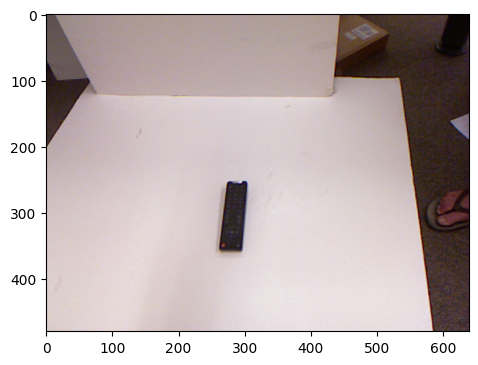

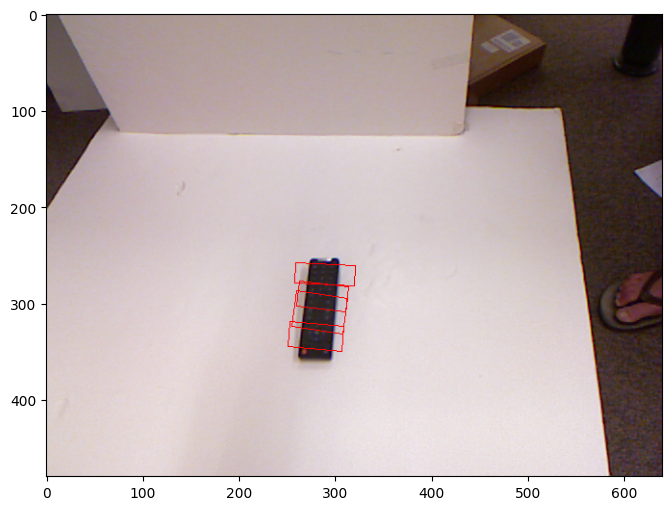

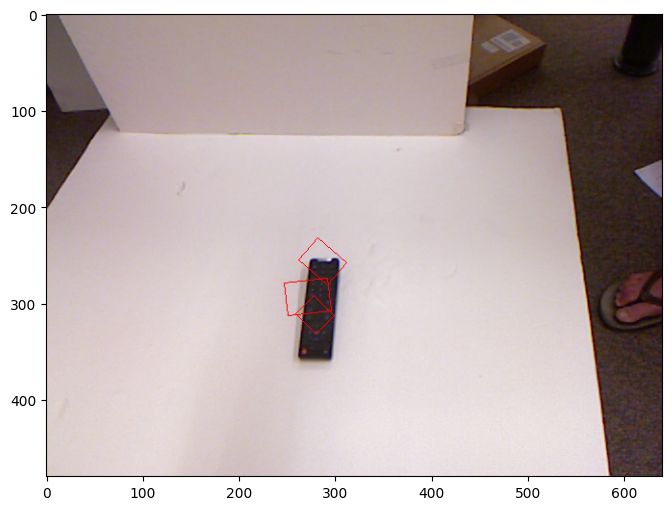

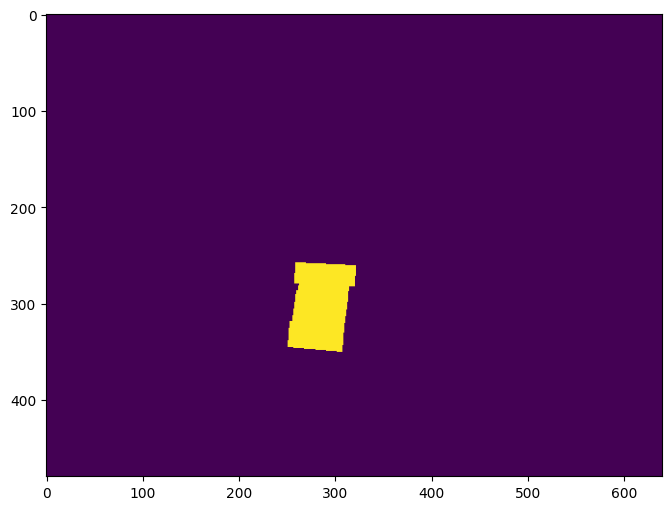

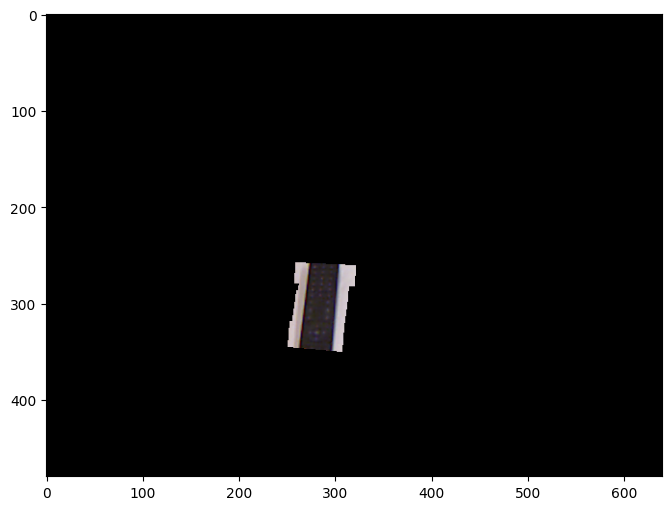

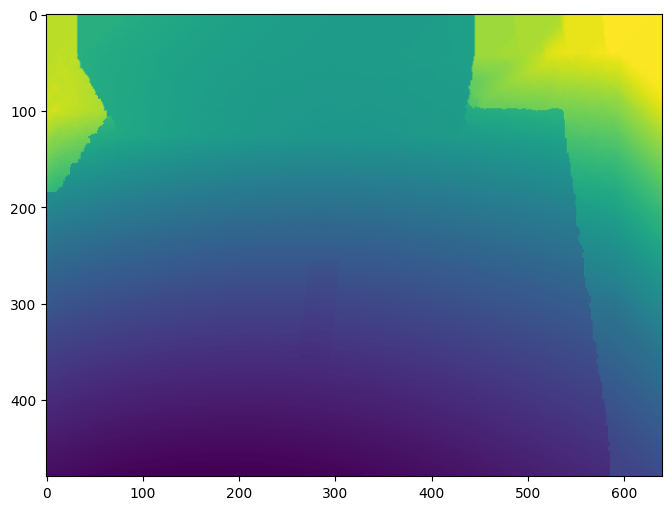

In [89]:
#P1 Inspect Dataset (when changing indices ensure they all match)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(images[0])
plt.show()
plt.figure(figsize=(12, 6))
plt.imshow(images_pos[0])
plt.show()
plt.figure(figsize=(12, 6))
plt.imshow(images_neg[0])
plt.show()
plt.figure(figsize=(12, 6))
plt.imshow(masks[0])
plt.show()
plt.figure(figsize=(12, 6))
#Trim Image using Mask
extracted = cv2.bitwise_and(images[0], images[0], mask=masks[0])
plt.imshow(extracted)
plt.show()
plt.figure(figsize=(12, 6))
plt.imshow(depth[0])



P2 Map all images using point cloud data (Drop in Chris's P2 Code and loop for all images)

In [ ]:
#P2



## From image.py it calls the DepthImage class and creates RGB and Depth Images

Note: The class "DepthImage" was modified so that it created RGB and Depth images.
Original Code Source: https://github.com/skumra/robotic-grasping/blob/master/utils/dataset_processing/image.py

In [ ]:
#P2  No need to call this again since the new RGB and Depth files have been created
"""
path = './data/01/'
pcds = glob.glob(os.path.join(path, 'pcd[0-9][0-9][0-9][0-9].txt'))  # Matches 'pcdXXXX.txt'
pcds.sort()

for pcd in pcds:
    di, rgb_img = DepthImage.from_pcd(pcd, (480, 640))

    # Save depth image
    depth_of_name = pcd.replace('.txt', '_depth.tiff')
    imwrite(depth_of_name, di.img.astype(np.float32))

    # Save RGB image
    rgb_of_name = pcd.replace('.txt', '_rgb.png')
    imwrite(rgb_of_name, rgb_img)
    """

P3
Perform a bunch of channel conversion magic (Chris's Code)
Do Bitwise extraction using stored masks
Plot extracted images

In [ ]:
#P3